In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [106]:
df=pd.read_csv('census_income.csv')

In [107]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [108]:
df.shape

(32560, 15)

In [109]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [112]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No Null values.

We need to change String columns into Numerical Values.

In [113]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we need to change string variable into numerical value.

In [114]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])

df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])

df['Income']=le.fit_transform(df['Income'])



In [115]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [116]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


skewness present in Marital_status,Relationship,Capital_gain and Capital_loss.
outliers present Capital_gain,Capital_loss and Age.

In [117]:
df_cor=df.corr()
df_cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


Income is highly correlate with Education_num and Age columns.
Income is least correlate with Realtionship.

<AxesSubplot:>

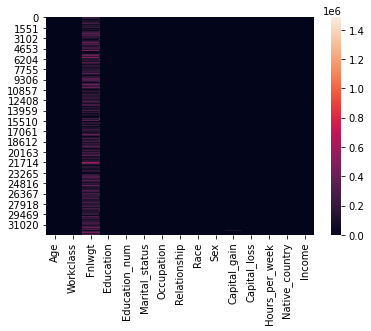

In [118]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

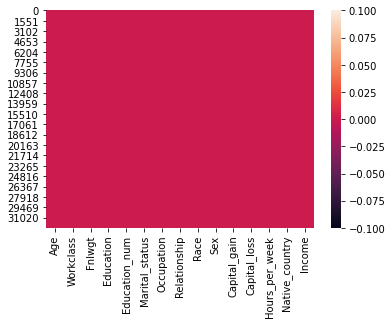

In [119]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

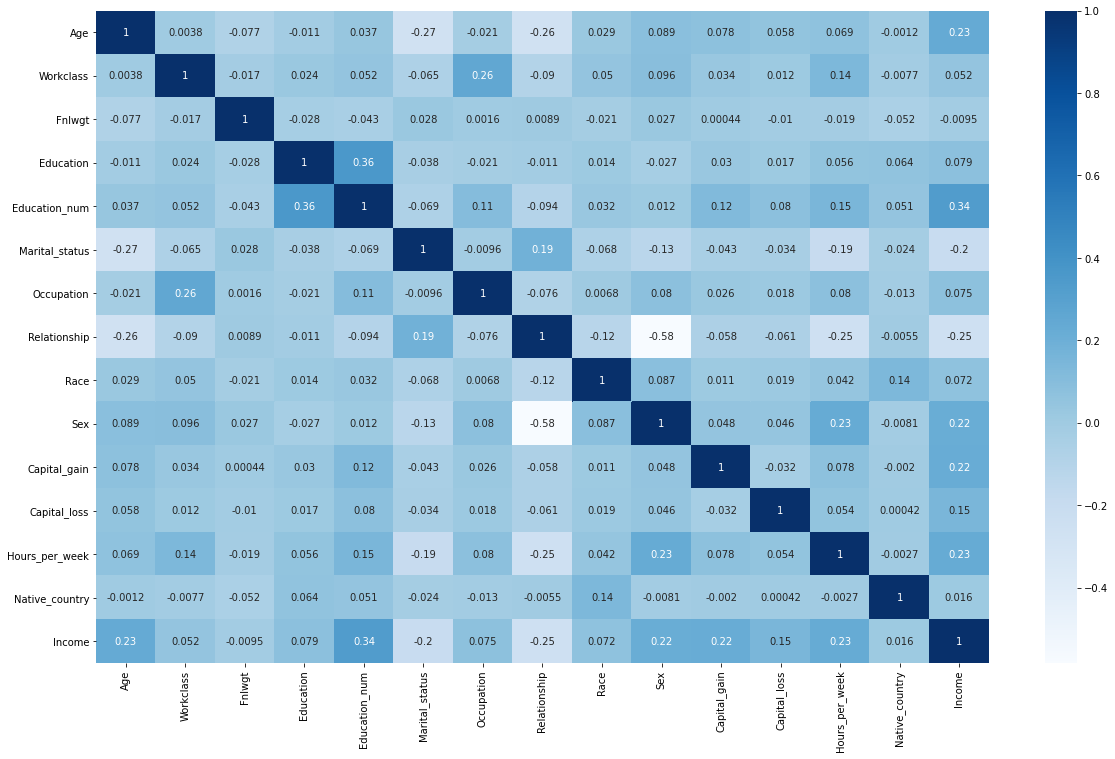

In [120]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Income is highly correlate with Age,Education_num,sex,Capital_gain and Hours_per_week.
Income is least correlate  with Marital_status and Relationship.

<AxesSubplot:>

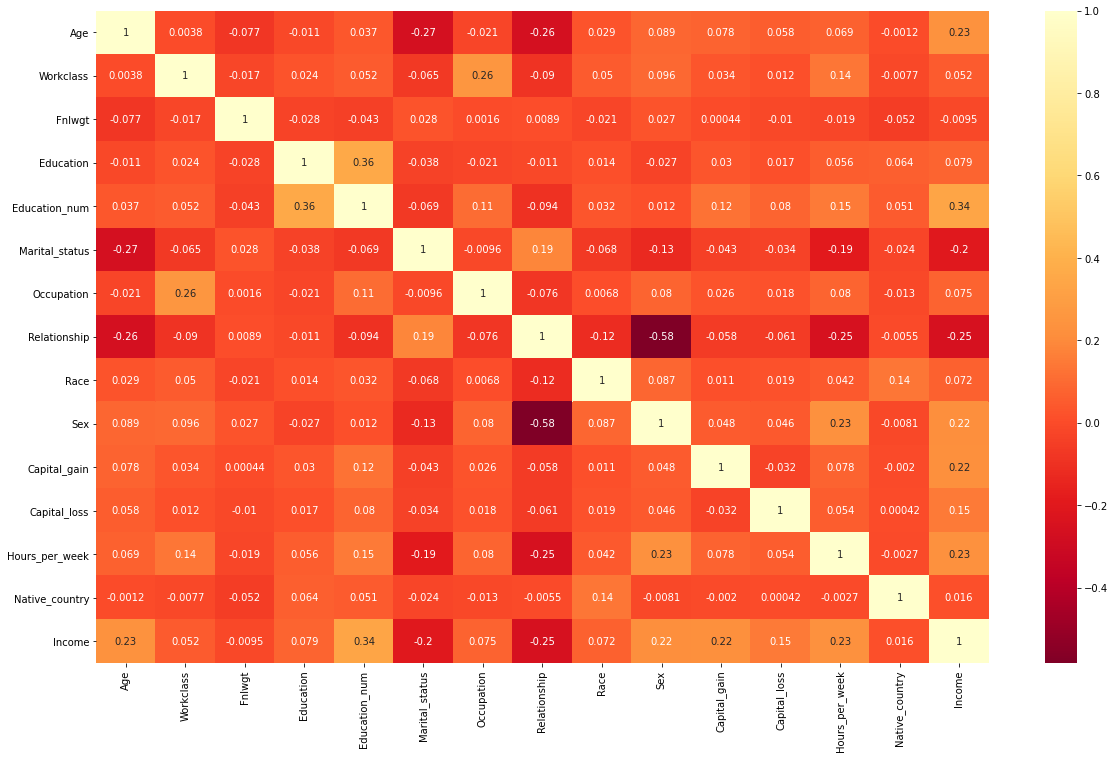

In [121]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Income is highly correlate with Age,Education_num,sex,Capital_gain and Hours_per_week.
Income is least correlate  with Marital_status and Relationship.

In [122]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

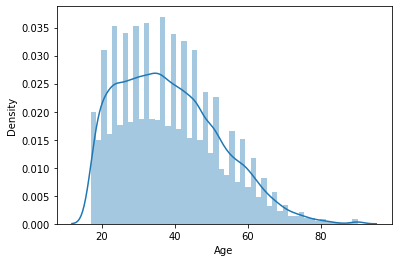

In [123]:
sns.distplot(df['Age'])

No skewness present.

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

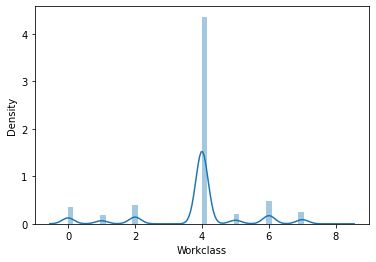

In [124]:
sns.distplot(df['Workclass'])

 skewness present.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

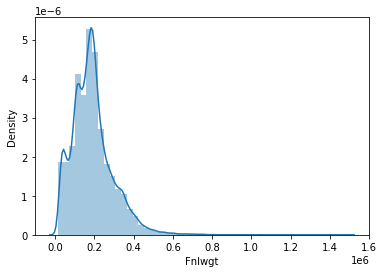

In [125]:
sns.distplot(df['Fnlwgt'])

skewness present.

<AxesSubplot:xlabel='Education', ylabel='Density'>

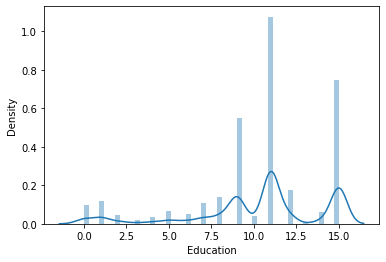

In [126]:
sns.distplot(df['Education'])

 skewness present.

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

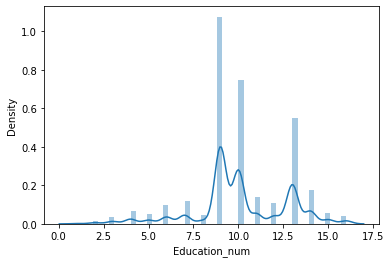

In [127]:
sns.distplot(df['Education_num'])

No skewness present.

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

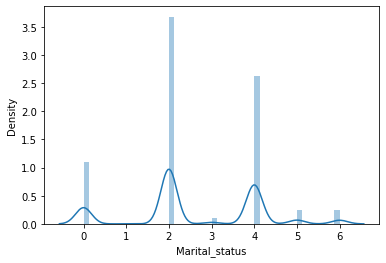

In [128]:
sns.distplot(df['Marital_status'])

No skewness present.

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

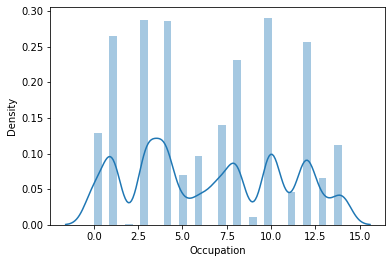

In [129]:
sns.distplot(df['Occupation'])

No skewness present.

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

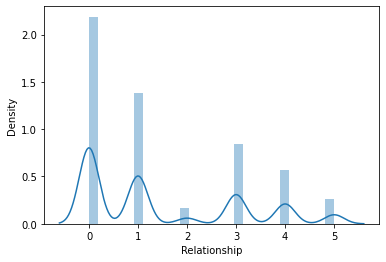

In [130]:
sns.distplot(df['Relationship'])

 skewness present.

<AxesSubplot:xlabel='Race', ylabel='Density'>

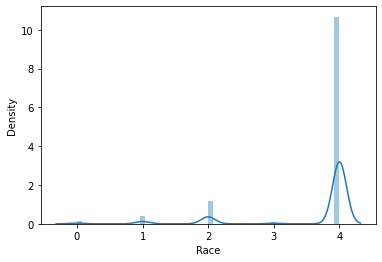

In [131]:
sns.distplot(df['Race'])

skewness present.

<AxesSubplot:xlabel='Sex', ylabel='Density'>

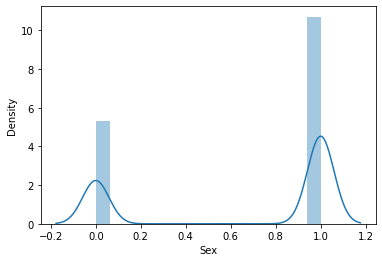

In [132]:
sns.distplot(df['Sex'])

 skewness present.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

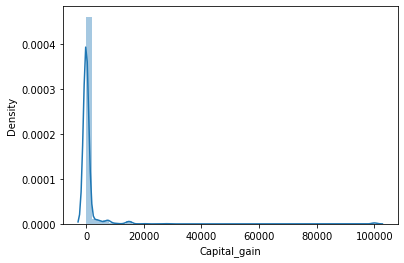

In [133]:
sns.distplot(df['Capital_gain'])

skewness present.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

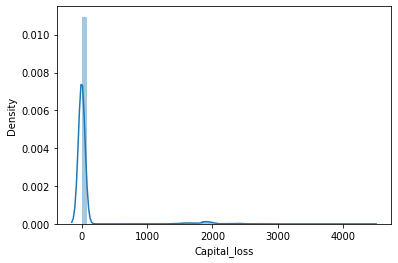

In [134]:
sns.distplot(df['Capital_loss'])

skewness present.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

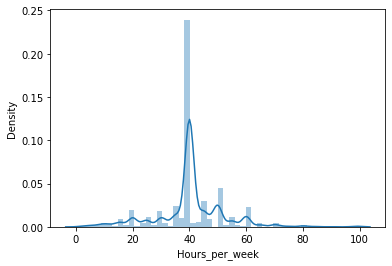

In [135]:
sns.distplot(df['Hours_per_week'])

No skewness present.

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

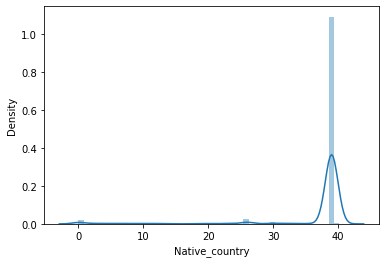

In [136]:
sns.distplot(df['Native_country'])

skewness present.

<AxesSubplot:xlabel='Income', ylabel='Density'>

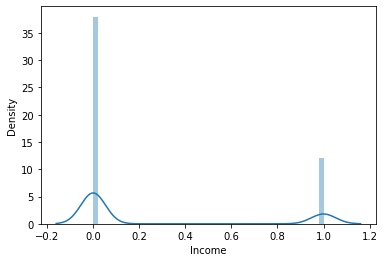

In [137]:
sns.distplot(df['Income'])

 skewness present.

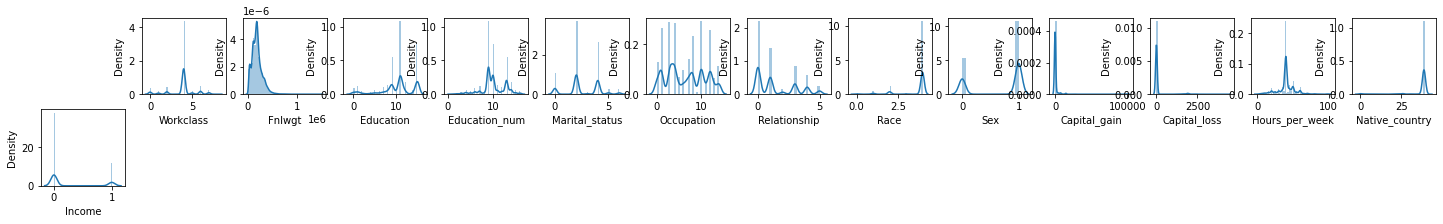

In [138]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [139]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

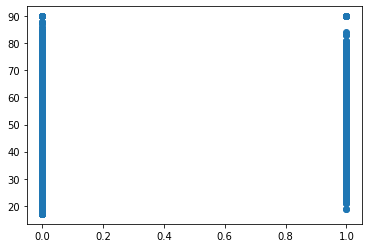

In [140]:
plt.scatter(df['Income'],df['Age'])

Age is defined from 0 to 90.

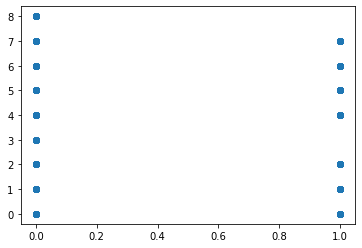

In [141]:
plt.scatter(df['Income'],df['Workclass'])

Workclass has a range from 0 to 8.

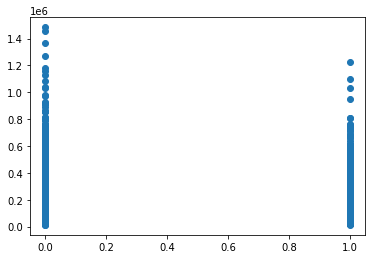

In [142]:
plt.scatter(df['Income'],df['Fnlwgt'])

Fnlwgt has a range from 0.0 to 1.4.

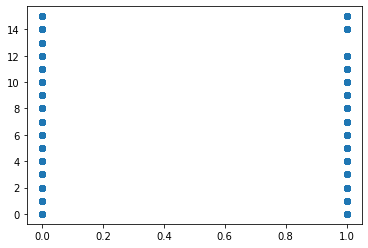

In [143]:
plt.scatter(df['Income'],df['Education'])

Education range from 0 to 14.

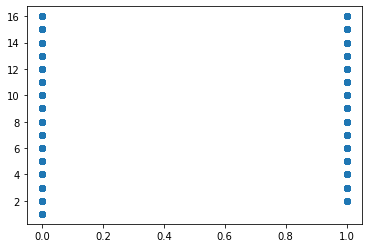

In [144]:
plt.scatter(df['Income'],df['Education_num'])

Education_num range from 0 to 16.

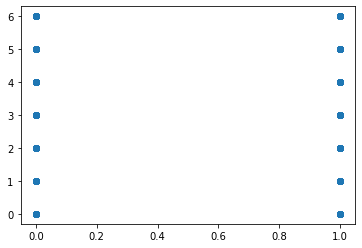

In [145]:
plt.scatter(df['Income'],df['Marital_status'])

Marital_status is spreaded from 0 to 6.

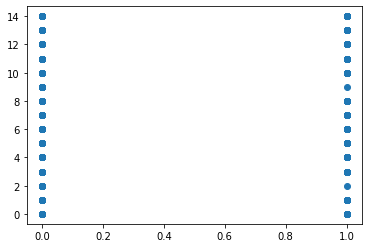

In [146]:
plt.scatter(df['Income'],df['Occupation'])

Occupation is spreaded from 0 to 14.

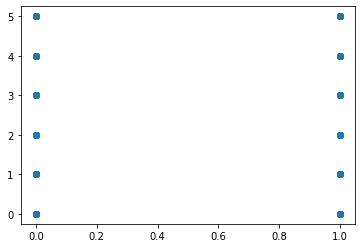

In [147]:
plt.scatter(df['Income'],df['Relationship'])

Relationship is spreaded from 0 to 5.

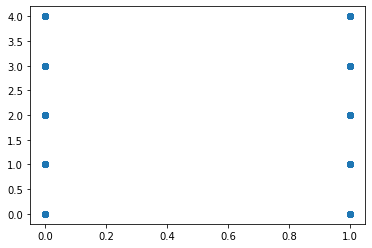

In [148]:
plt.scatter(df['Income'],df['Race'])

Race column range from 0 to 4.

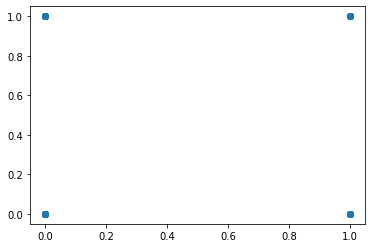

In [149]:
plt.scatter(df['Income'],df['Sex'])

Sex is showing 0 and 1.

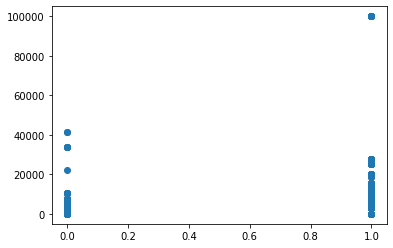

In [150]:
plt.scatter(df['Income'],df['Capital_gain'])

Capital_gain is in the range from 0 to 40000.

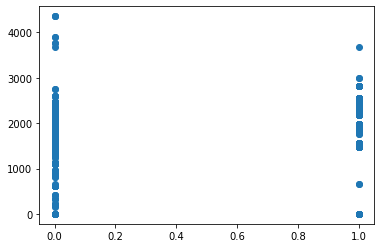

In [151]:
plt.scatter(df['Income'],df['Capital_loss'])

Capital_loss is spreaded from 0 to 4000 range.

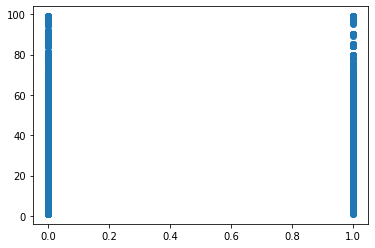

In [152]:
plt.scatter(df['Income'],df['Hours_per_week'])

Hours_per_week is spreaded in the range of 0 to 100.

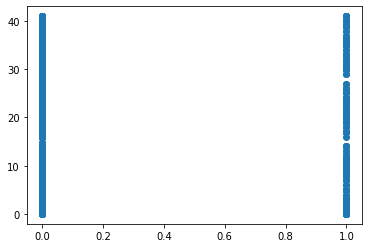

In [153]:
plt.scatter(df['Income'],df['Native_country'])

Native_country is in the range of 0 to 40.

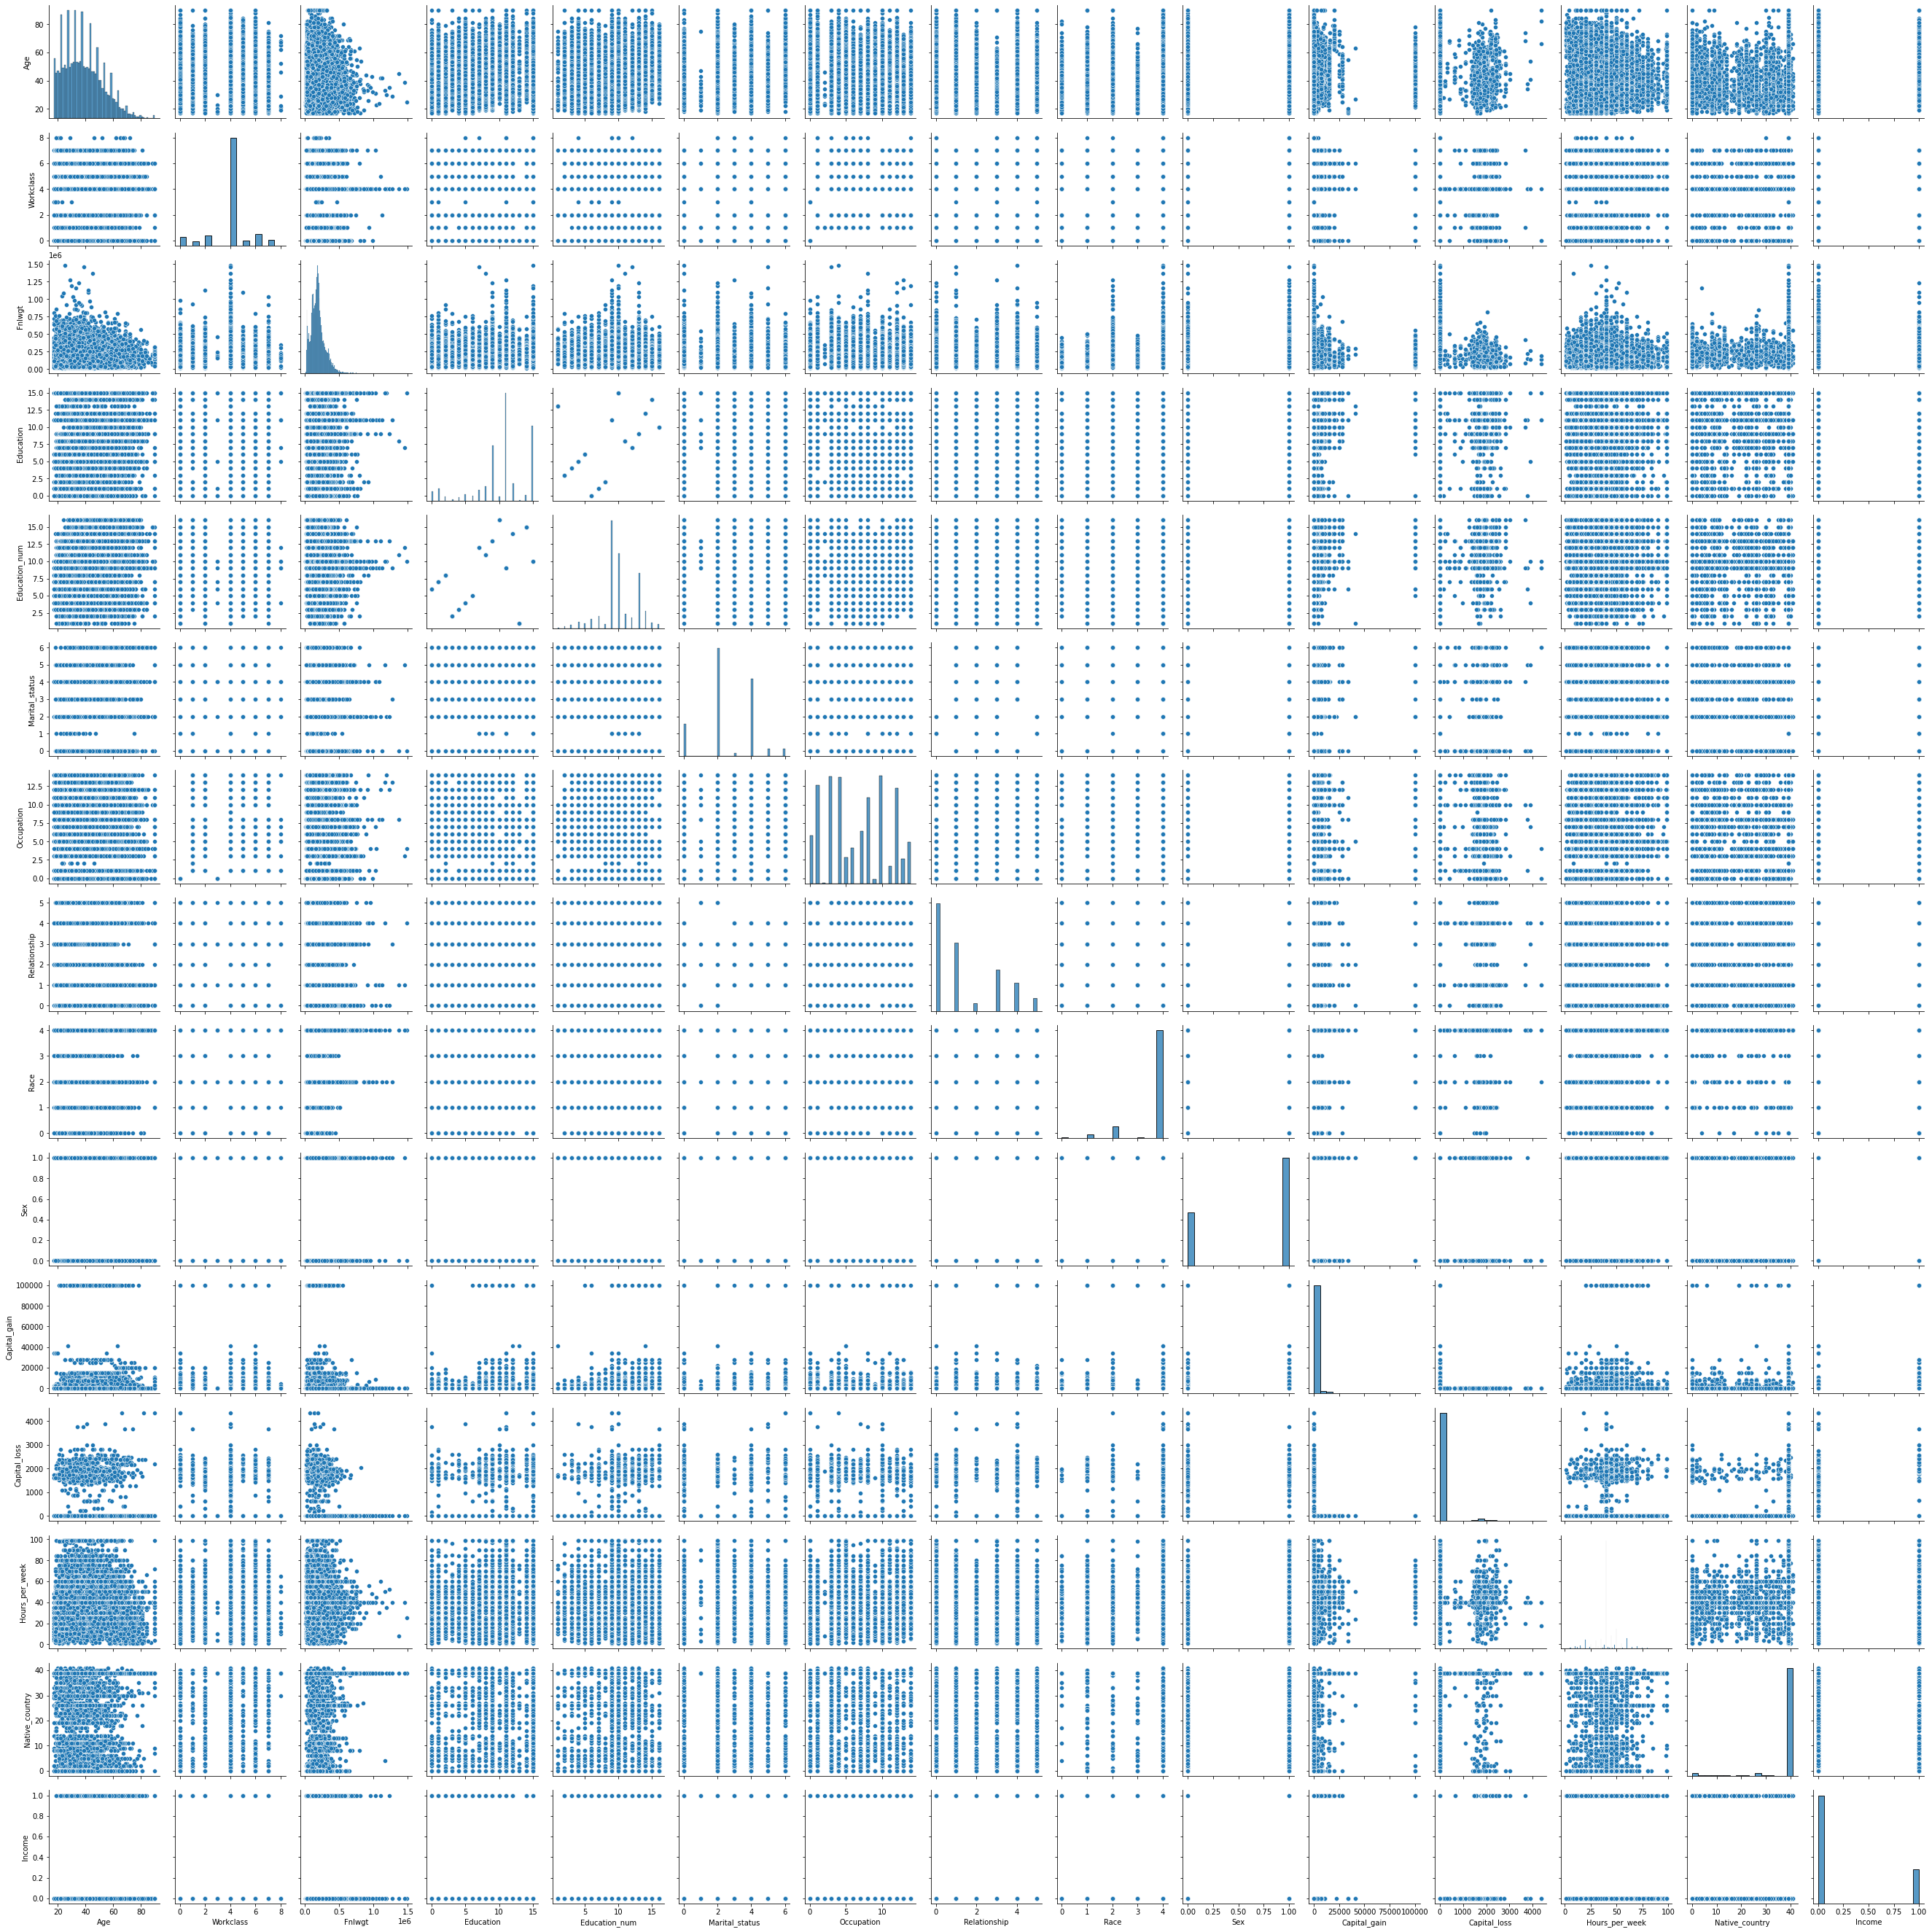

In [154]:
sns.pairplot(df)

In [155]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

skewness present in workclass,Fnlwgt,Education,Relationship,Race,Sex,Capital_gain,Capital_Loss,Native_country.      

# Removing Skewness

skewness will be removed from continous data only ,not for object type column.

In [156]:
df['Fnlwgt']=np.log1p(df['Fnlwgt'])

In [161]:
df['Capital_gain']=np.log1p(df['Capital_gain'])

In [162]:
df['Capital_loss']=np.log1p(df['Capital_loss'])

In [164]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [165]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:>

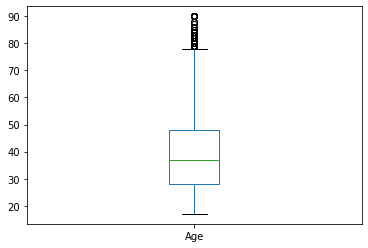

In [166]:
df['Age'].plot.box()

 outliers present.

<AxesSubplot:>

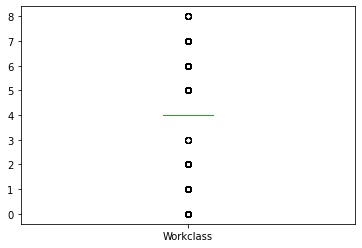

In [167]:
df['Workclass'].plot.box()

outliers present.

<AxesSubplot:>

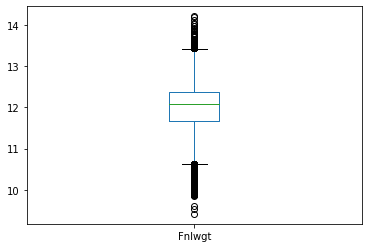

In [168]:
df['Fnlwgt'].plot.box()

outliers present.

<AxesSubplot:>

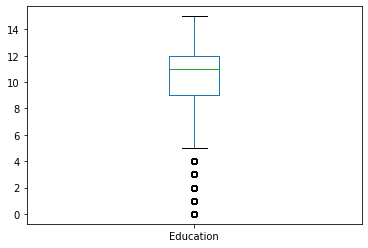

In [169]:
df['Education'].plot.box()

 outliers present.

<AxesSubplot:>

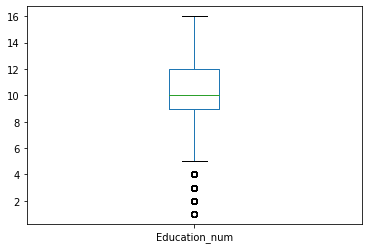

In [170]:
df['Education_num'].plot.box()

 outliers present.

<AxesSubplot:>

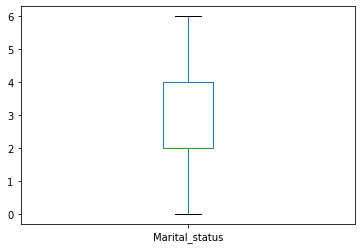

In [171]:
df['Marital_status'].plot.box()

No outliers present.

<AxesSubplot:>

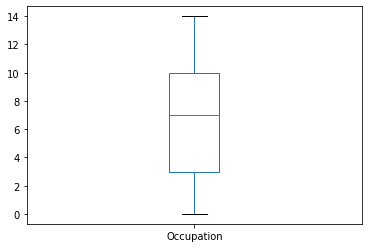

In [172]:
df['Occupation'].plot.box()

No outliers present.

<AxesSubplot:>

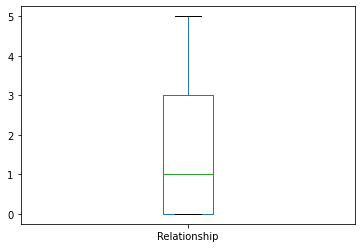

In [173]:
df['Relationship'].plot.box()

No outliers present.

<AxesSubplot:>

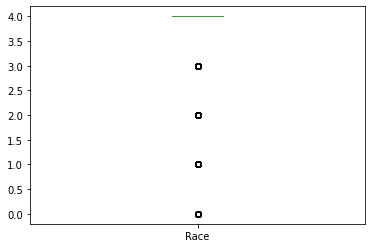

In [174]:
df['Race'].plot.box()

 outliers present.

<AxesSubplot:>

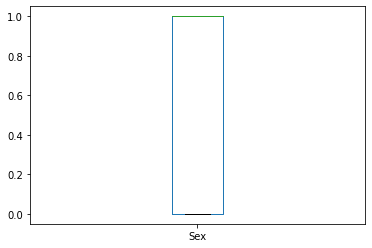

In [175]:
df['Sex'].plot.box()

No outliers present.

<AxesSubplot:>

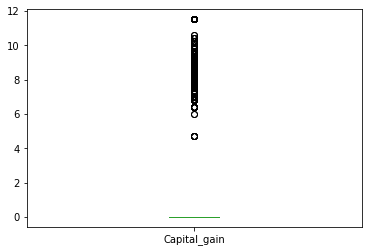

In [176]:
df['Capital_gain'].plot.box()

No outliers present.

<AxesSubplot:>

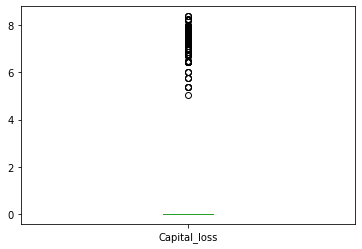

In [177]:
df['Capital_loss'].plot.box()

No outliers present.

<AxesSubplot:>

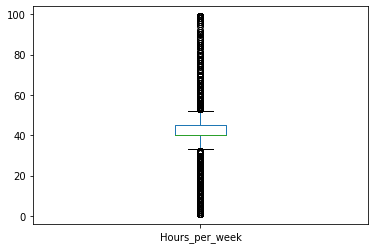

In [178]:
df['Hours_per_week'].plot.box()

No outliers present.

<AxesSubplot:>

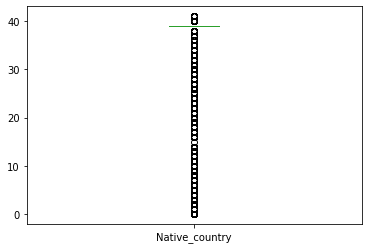

In [179]:
df['Native_country'].plot.box()

No outliers present.

<AxesSubplot:>

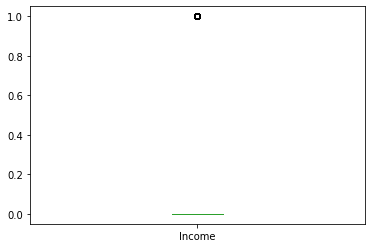

In [180]:
df['Income'].plot.box()

No outliers present.

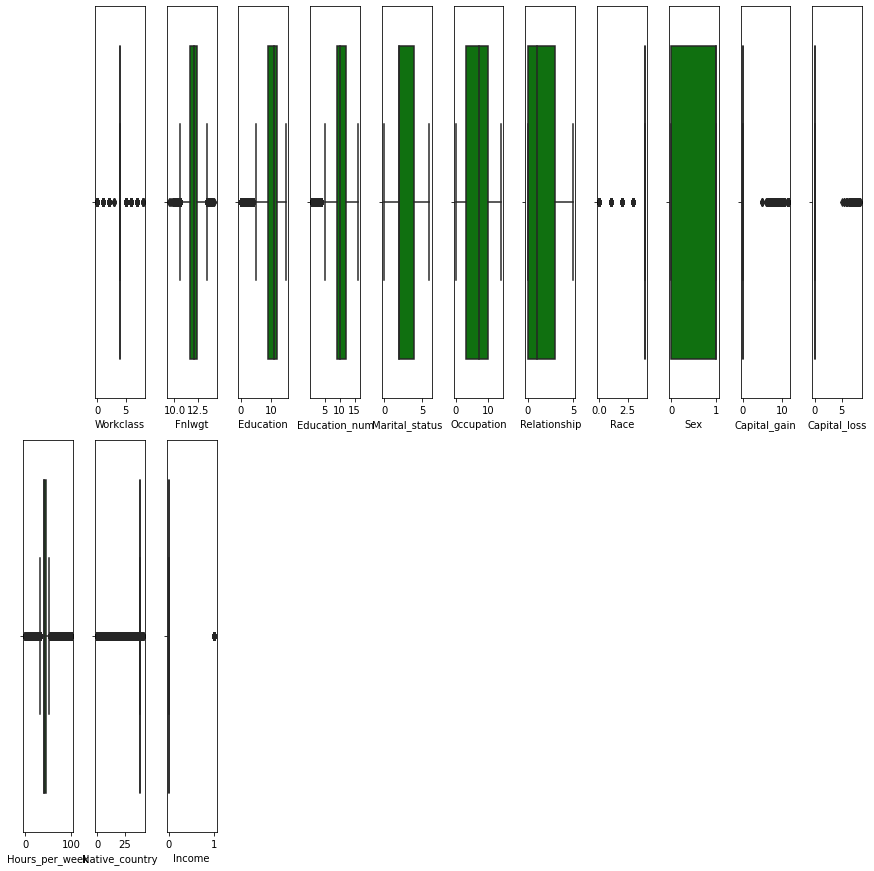

In [181]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Workclass,fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country.

In [182]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [183]:
df.dtypes

Age                 int64
Workclass           int32
Fnlwgt            float64
Education           int32
Education_num       int64
Marital_status      int32
Occupation          int32
Relationship        int32
Race                int32
Sex                 int32
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country      int32
Income              int32
dtype: object

# Removing Outliers

In [184]:
from scipy.stats import zscore
z=np.abs(zscore(df[['Age','Fnlwgt','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]))
print(np.where(z>3))

(array([    3,    10,    13, ..., 32532, 32550, 32552], dtype=int64), array([8, 6, 6, ..., 6, 6, 6], dtype=int64))


In [185]:
z[3][8]

4.054156655343599

In [186]:
z[10][6]

3.1407120742466126

In [187]:
df1=df[(z<3).all(axis=1)]

In [188]:
df1.shape

(29650, 15)

In [189]:
df.shape

(32560, 15)

32560-29650=2910 outliers are removed from Dataframe.

In [190]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39,0
1,38,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39,0
2,53,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39,0
3,28,4,12.732013,9,13,2,10,5,2,0,0.0,0.0,40,5,0
4,37,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39,0


In [191]:
x=df.iloc[:,0:-1]
y=df.iloc[:,14]



In [192]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,11.330348,9,13,2,4,0,4,1,0.000000,0.0,13,39
1,38,4,12.281398,11,9,0,6,1,4,1,0.000000,0.0,40,39
2,53,4,12.366157,1,7,2,6,0,2,1,0.000000,0.0,40,39
3,28,4,12.732013,9,13,2,10,5,2,0,0.000000,0.0,40,5
4,37,4,12.558780,12,14,2,4,5,4,0,0.000000,0.0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,12.458010,7,12,2,13,5,4,0,0.000000,0.0,38,39
32556,40,4,11.947140,11,9,2,7,0,4,1,0.000000,0.0,40,39
32557,58,4,11.931050,11,9,6,1,4,4,0,0.000000,0.0,40,39
32558,22,4,12.213500,11,9,4,1,3,4,1,0.000000,0.0,20,39


In [193]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [194]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= accuracy_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [195]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LogisticRegression()
dt=DecisionTreeClassifier()


list=[lr,dt]

for var in list:
    print(var)
    get_score(var)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
max score 0.8249418334108888
max i 102
[[7651  484]
 [1433 1177]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8135
           1       0.71      0.45      0.55      2610

    accuracy                           0.82     10745
   macro avg       0.78      0.70      0.72     10745
weighted avg       0.81      0.82      0.81     10745

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
    

# AUC ROC CURVE¶

In [196]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [197]:
y_pred_prob=dt.predict_proba(x_test)[:,0]

In [198]:
y_pred_prob

array([1., 1., 0., ..., 1., 0., 1.])

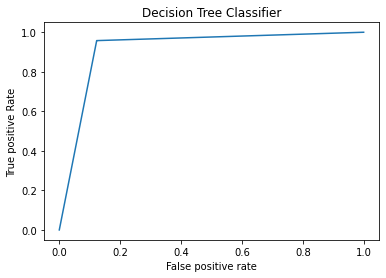

0.9170583265735462

In [199]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# cross validation

In [200]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.80829572 0.80803955 0.80262309 0.81272845 0.81272845 0.82089873
 0.81530854]
0.811517503731939 0.005436630956542735


In [201]:

score=cross_val_score(lr,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.81775199 0.81857266 0.81681359 0.81616857 0.81337347 0.8200387
 0.81767362]
0.8171989410377843 0.0019393270775004984


# Grid search CV

In [202]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,grid_param,scoring='accuracy',cv=5)
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'entropy'}
0.8152948402948403


logistic regression is the best model as the difference between crossvalidation score and model is least.

# Saving the model

In [203]:
import joblib
joblib.dump(lr,'census.obj')

['census.obj']

In [204]:
file=joblib.load('census.obj')
file.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])